### SQL Structured Query Language

A linguagem SQL se divide em três grupos

DML - Data Manipulation Language (Desenvolvimento)
- SELECT: Pesquisa de dados
- UPDATE: Atualização de dados
- DELETE: Eliminação de dados
- INSERT: Inserção de dados

DDL - Data Definition Language (Suporte)
- CREATE: Definição de um objeto (tabela, índice)
- ALTER: Alteração de um objeto
- DROP: Eliminação de um objeto

DCL - Data Control Language (Desenvolvimento/Suporte)
- GRANT: Fornece um privilégio
- REVOKE: Tira um privilégio

### SQLite

SQLite é um engine (motor) de banco de dados SQL sendo uma versão simplificada de um SGBD gerando um alto ganho de performance em uma maquina local, todo o banco de dados criando em SQLite fica em um unico arquivo.

Por que usar o SQLite?
- Não requer um processo servidor dedicado.
- Configuração zero, o que significa que nenhuma configuração ou administração é necessária.
- Um banco de dados SQLite completo é armazenado em um único arquivo multiplataforma.
- SQLite é pequeno e leve, menos de 400KB quando totalmente configurado.

In [51]:
# Usando a pacote OS para excluir uma tabela
import os
os.remove('./dados/prods.db') if os.path.exists('./dados/prods.db') else None

In [28]:
# Vamos iniciar importando o SQLite
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Agora vamos criar uma conexão com o banco de dados
# Se o banco de dados não existir ele é criado nesse momento
con = sqlite3.connect('./dados/escola.db')

In [3]:
# Precisamos criar um cursor
# Um cursor permite que percorra todos os registros em um conjunto de dados
cur = con.cursor()

In [4]:
# Agora precisamos criar as tabelas e iremos usar comandos do SQL
# Vamos alocar os comandos em uma variavel

sql_create = 'create table cursos '\
'(id integer primary key, '\
'titulo varchar(100), '\
'categoria varchar(140))'

In [5]:
# Executando a instrução sql no cursor
cur.execute(sql_create)

OperationalError: table cursos already exists

In [12]:
# Criando outra sentença SQL para inserir registro
sql_insert = 'insert into cursos values (?, ?, ?)'

In [11]:
# Dados a inserir
recset = [(1000, 'Ciência de Dados', 'Data Science'),
          (1001, 'Big Data Fundamentos', 'Big Data'),
          (1002, 'Python Fundamentos', 'Análise de Dados')]

In [12]:
# Inserindo os registros
for rec in recset:
    cur.execute(sql_insert, rec)

In [13]:
# Gravar a transação
con.commit()

In [7]:
# Criando outra sentença SQL para selecionar registros
sql_select = 'select * from cursos'

In [8]:
# Selecionando todos os registros e recuperando os registros
cur.execute(sql_select)
dados = cur.fetchall()

In [17]:
# Imprimir os dados
for row in dados:
    print('Curso ID: %d, Titulo: %s, Categoria: %s \n' % row)

Curso ID: 1000, Titulo: Ciência de Dados, Categoria: Data Science 

Curso ID: 1001, Titulo: Big Data Fundamentos, Categoria: Big Data 

Curso ID: 1002, Titulo: Python Fundamentos, Categoria: Análise de Dados 



In [10]:
# Gerando mais registros
recset = [(1003,'Gestão de Dados com MongoDB','Big Data'),
          (1004,'R Fundamentos','Análise de Dados')]

In [13]:
# Adicionando novos valores
for rec in recset:
    cur.execute(sql_insert, rec)

In [14]:
# Selecionando todos os valores
cur.execute(sql_select)
dados = cur.fetchall()

# Imprimir todos os dados
for row in dados:
    print('Curso ID: %d, Titulo: %s, Categoria: %s \n' % row)

Curso ID: 1000, Titulo: Ciência de Dados, Categoria: Data Science 

Curso ID: 1001, Titulo: Big Data Fundamentos, Categoria: Big Data 

Curso ID: 1002, Titulo: Python Fundamentos, Categoria: Análise de Dados 

Curso ID: 1003, Titulo: Gestão de Dados com MongoDB, Categoria: Big Data 

Curso ID: 1004, Titulo: R Fundamentos, Categoria: Análise de Dados 



In [15]:
con.commit()

In [16]:
# Fechando a conexão do banco de dados
con.close()

In [31]:
# Criando um novo banco de dados para produtos de uma loja
conn = sqlite3.connect('./dados/prods.db') 
# Criando o cursor
cur = conn.cursor()

In [2]:
# Criar função para criar tabela
def create_table():
    cur.execute('CREATE TABLE IF NOT EXISTS Produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, prod_name TEXT, tipo_prod TEXT, valor REAL)')

# Criar função para inserir um linha a partir dos parametros da função
def insert(lista):
    cur.execute('INSERT INTO Produtos VALUES(?,?,?,?,?)', lista)
    conn.commit()

# Função para fechar o banco de dados
def close():
    cur.close()
    conn.close()
    
# Função para leitura de todos os dados    
def imprimir():
    cur.execute('SELECT * FROM Produtos')
    for row in cur.fetchall():
        print(row)
        

# Função para leitura dos registros especificos
def imprimi_registros():
    cur.execute('SELECT * FROM PRODUTOS WHERE valor > 298.0')
    for row in cur.fetchall():
        print(row)

# Função para leitura das colunas especificas
def imprimi_coluna():
    cur.execute('SELECT * FROM Produtos')
    for row in cur.fetchall():
        print(row[3])
        
        
# Update
def atualiza_dados():
    cur.execute('UPDATE Produtos SET valor = 179.90 WHERE valor <= 159.90')
    conn.commit()
    

# Delete 
def remove_dados():
    cur.execute('DELETE FROM Produtos WHERE valor <= 99.90')
    conn.commit()
    

In [21]:
lista = [6, '30-08-2022', 'Samsung Galaxy A30', 'Smartphone', 77.90]

In [ ]:
# Chamando a função para criar a tabela
create_table()

In [22]:
# Inserindo valores a partir da função passando os parametros 
insert(lista)

In [23]:
# Retornando os valores
imprimir()

(1, '27-07-2022', 'Redragon K688 Rainbow', 'Teclado', 347.9)
(2, '27-07-2022', 'Redragon K617 Fizz', 'Teclado', 277.9)
(3, '31-08-2022', 'Fifine Gamer H6', 'Headset', 179.9)
(4, '31-08-2022', 'SelfiePro Bluetooth', 'Tripe', 179.9)
(5, '30-08-2022', 'Fifine Ampligame A8', 'Microfone', 377.9)
(6, '30-08-2022', 'Samsung Galaxy A30', 'Smartphone', 77.9)


In [17]:
# Retornando registros especificos
imprimi_registros()

(1, '27-07-2022', 'Redragon K688 Rainbow', 'Teclado', 347.9)
(5, '30-08-2022', 'Fifine Ampligame A8', 'Microfone', 377.9)


In [18]:
# Retornando colunas especificas
imprimi_coluna()

Teclado
Teclado
Headset
Tripe
Microfone


In [19]:
# Alterando os dados com Update
atualiza_dados()

In [24]:
# Retornando os valores
imprimir()

(1, '27-07-2022', 'Redragon K688 Rainbow', 'Teclado', 347.9)
(2, '27-07-2022', 'Redragon K617 Fizz', 'Teclado', 277.9)
(3, '31-08-2022', 'Fifine Gamer H6', 'Headset', 179.9)
(4, '31-08-2022', 'SelfiePro Bluetooth', 'Tripe', 179.9)
(5, '30-08-2022', 'Fifine Ampligame A8', 'Microfone', 377.9)
(6, '30-08-2022', 'Samsung Galaxy A30', 'Smartphone', 77.9)


In [25]:
# Removendo dados com o Delete
remove_dados()

In [26]:
# Retornando os valores
imprimir()

(1, '27-07-2022', 'Redragon K688 Rainbow', 'Teclado', 347.9)
(2, '27-07-2022', 'Redragon K617 Fizz', 'Teclado', 277.9)
(3, '31-08-2022', 'Fifine Gamer H6', 'Headset', 179.9)
(4, '31-08-2022', 'SelfiePro Bluetooth', 'Tripe', 179.9)
(5, '30-08-2022', 'Fifine Ampligame A8', 'Microfone', 377.9)


In [27]:
# Fechando o banco
close()

In [33]:
import plotly.express as px

In [42]:
# Vamos trabalhar com gráficos a partir do Matplotlib usando o banco de dados
def dados_grafico():
    cur.execute("SELECT id, valor FROM Produtos")
    ids = []
    valores = []
    dados = cur.fetchall()
    for row in dados:
        ids.append(row[0])
        valores.append(row[1])
        
    plt.bar(ids, valores)
    plt.show()

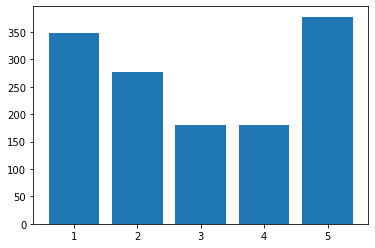

In [43]:
# Gerando gráficos
dados_grafico()